# Evaluación Final Módulo 3

In [1]:
# IMPORTAMOS LAS LIBRERÍAS QUE NECESITAMOS

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer 
from sklearn.experimental import enable_iterative_imputer # Necesario para IterativeImputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import KNNImputer 

# Visualización
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

### FASE 1: Exploración y limpieza.

1. **Exploración inicial:**

    - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
    - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
    - Une los dos conjuntos de datos de la forma más eficiente.



2. **Limpieza de datos:**

    - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
    - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
    - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [62]:
## Cargamos los datos de ambos ficheros: 

df_CFA = pd.read_csv('data/Customer-Flight-Activity.csv')
df_CLH = pd.read_csv('data/Customer-Loyalty-History.csv')

En primer lugar se estudiará el conjunto de datos "Customer Fligth Analysis" y posteriormente, se hará lo mismo con el conjunto de datos "Customer Loyalty History".

## **Dataframe**: Customer Fligth Analysis 

Este archivo contiene información sobre la actividad de vuelo de los clientes, incluyendo el número de vuelos reservados, la distancia volada, puntos acumulados y redimidos, y costos asociados a los puntos redimidos. 

- **Loyalty Number**: Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.
- **Year**: Indica el año en el cual se registraron las actividades de vuelo para el cliente.
- **Month**: Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
- **Flights Booked**: Número total de vuelos reservados por el cliente en ese mes específico.
- **Flights with Companions**: Número de vuelos reservados en los cuales el cliente viajó con acompañantes.
- **Total Flights**: El número total de vuelos que el cliente ha realizado, que puede incluir vuelos reservados en meses anteriores.
- **Distance**: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.
- **Points Accumulated**: Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.
- **Points Redeemed**: Puntos que el cliente ha redimido en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
- **Dollar Cost Points Redeemed**: El valor en dólares de los puntos que el cliente ha redimido durante el mes.

In [63]:
# Realizamos una visualización rápida de los datos: 

display(df_CFA.head(3))
display(df_CFA.tail(3))
display(df_CFA.sample(3))

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
340065,208961,2018,9,0,0,0,0,0.0,0,0
11175,694472,2017,1,3,0,3,246,24.0,0,0
65259,245440,2017,5,0,0,0,0,0.0,0,0


In [64]:
print(f'El número de filas es de {df_CFA.shape[0]} y el número de columnas es de {df_CFA.shape[1]}.')

print('Las diferentes columnas que tenemos son:')
num = 0
for i in df_CFA.columns: 
    num +=1
    print(f'    {num}. {i}')

El número de filas es de 405624 y el número de columnas es de 10.
Las diferentes columnas que tenemos son:
    1. Loyalty Number
    2. Year
    3. Month
    4. Flights Booked
    5. Flights with Companions
    6. Total Flights
    7. Distance
    8. Points Accumulated
    9. Points Redeemed
    10. Dollar Cost Points Redeemed


In [65]:
# Obtenemos información del conjunto de datos.
df_CFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [66]:
# Ninguna variable tiene valores nulos. 

In [67]:
# Vamos a homogeneizar los nombres de las columnas, siendo el cambio que le vamos a hacer quitar los espacios en los nombres y sustituirlos por 
# barras bajas (_); ya que tener espacios en los nombres de nuestras columnas pueden llevar a errores cuando queramos realizar algunos comandos. 

new_col = {col: col.replace(' ', '_') for col in df_CFA.columns}
df_CFA.rename(columns=new_col, inplace=True)
df_CFA.columns

Index(['Loyalty_Number', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed'],
      dtype='object')

In [68]:
# Vamos a realizar un análisis descriptivo de los datos para poder tener una idea general de los mismos. 
df_CFA.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty_Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights_Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights_with_Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total_Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points_Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points_Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar_Cost_Points_Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [69]:
# En nuestro conjunto de datos no existe ninguna variable que sea de tipo categórica, por lo que no tenemos que hacer un 
# análisis estadístico a parte de este tipo de variables.

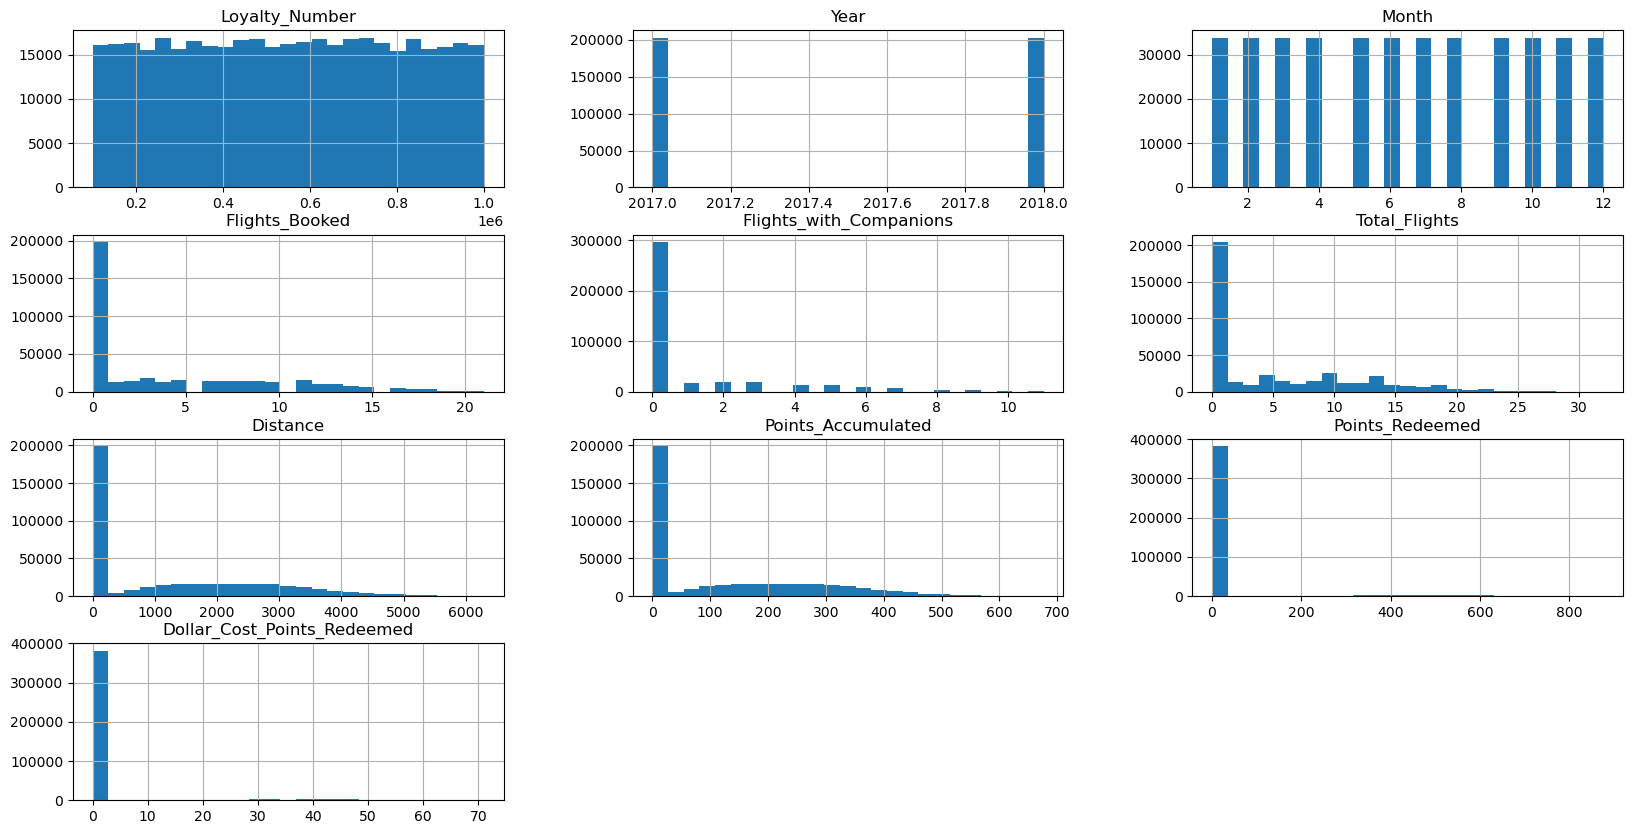

In [70]:
# Vamos a hacer un análisis de las variables. 

# Histograma: 

df_CFA.hist(bins=25, figsize=(20, 10));

In [ ]:
# Aunque realizamos los histogramas de todas las columnas, no tendría mucho sentido hacerlas, ya que algunas variables como puede ser "Loyalty Number" no 
# niene sentido representarla porque es un identificador único de cliente o "Flights Booked", ya que son el total de vuelos reservados por el cliente en 
# un mes específico y sin tener en cuenta el mes, no tiene sentido su representación. 

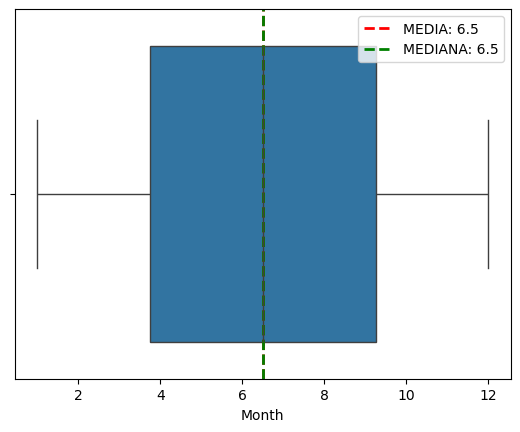

In [82]:
# Vamos a hacer unos boxplots de aquellas variables que parezca tener más sentido representar.

sns.boxplot(data = df_CFA, x = 'Month')
mean_month = df_CFA['Month'].mean()
median_month = df_CFA['Month'].median()
plt.axvline(x = mean_month, color = 'red', linestyle='--', linewidth = 2, label = f"MEDIA: {mean_month}")
plt.axvline(x = median_month, color = 'green', linestyle='--', linewidth = 2, label = f"MEDIANA: {median_month}")
plt.legend();


In [ ]:
# Realizar un boxplots con la variable 'Month', no nos arroja grandes conclusiones, ya que para todos los meses tenemos el mismo número de datos.
df_CFA['Month'].value_counts()

Month
1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: count, dtype: int64

In [79]:
# Probablemente, este conjunto de datos no nos de mucha información sin unirlo con el conjunto de datos de "Customer Loyalty History".

In [105]:
nulos = (df_CFA.isnull().sum()/df_CFA.shape[0]*100).reset_index()
nulos.rename(columns={'index': 'columna', 0:'% nulos'}, inplace=True)

if nulos['% nulos'].sum() == 0: 
    print('Ninguna columna tiene valores nulos. Puedes continuar con tu estudio.')
else: 
    col_nulos = nulos.loc[nulos['% nulos']!=0, 'columna'].to_list() 
    for i in col_nulos:
        print(f'La siguiente columna tiene valores nulos: {i}')

Ninguna columna tiene valores nulos. Puedes continuar con tu estudio.


In [ ]:
# Con esta función podemos saber que variables de nuestro dataframe tiene valores nulos. 
# Nos devuleve el nombre de las columnas que tiene valores nulos, de manera que podemos 
# guardarlas en una variable (lista), por si se necesitan a posteriori.

def variables_nulas(dataframe): 
    nulos = (dataframe.isnull().sum()/dataframe.shape[0]*100).reset_index()
    nulos.rename(columns={'index': 'columna', 0:'%_nulos'}, inplace=True)

    if nulos['%_nulos'].sum() == 0: 
        print('Ninguna columna tiene valores nulos. Puedes continuar con tu estudio.')
    else: 
        col_nulos = nulos.loc[nulos['%_nulos']!=0, 'columna'].to_list() 
        for i in col_nulos:
            print(f'La siguiente columna tiene valores nulos: {i}')
        return col_nulos

In [118]:
b = variables_nulas(df_CFA)

Ninguna columna tiene valores nulos. Puedes continuar con tu estudio.


In [116]:
c = variables_nulas(df_CLH)

La siguiente columna tiene valores nulos: Salary
La siguiente columna tiene valores nulos: Cancellation Year
La siguiente columna tiene valores nulos: Cancellation Month


In [117]:
c

['Salary', 'Cancellation Year', 'Cancellation Month']

In [115]:
col_nulos

['Loyalty_Number',
 'Year',
 'Month',
 'Flights_Booked',
 'Flights_with_Companions',
 'Total_Flights',
 'Distance',
 'Points_Accumulated',
 'Points_Redeemed',
 'Dollar_Cost_Points_Redeemed']

In [109]:
col_nulos

['Loyalty_Number',
 'Year',
 'Month',
 'Flights_Booked',
 'Flights_with_Companions',
 'Total_Flights',
 'Distance',
 'Points_Accumulated',
 'Points_Redeemed',
 'Dollar_Cost_Points_Redeemed']

In [ ]:
# 7. NULOS

nulos = (df_clientes.isnull().sum()/df_clientes.shape[0]*100).reset_index()

nulos.rename(columns={'index': 'columna', 0:'% nulos'}, inplace=True)

mascara = nulos['% nulos'] > 0

nulos = nulos[mascara]

nulos